In [1]:
import pandas as pd
import numpy as np

from random import sample
from utility import populate_games

pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt

from pyaml_env import parse_config
config = parse_config('config.yaml')

## Data Generation
Here we call functions from 'utility.py' to populate a dataframe with 100 games from teams created from our playerbase. End result is a labeled dataset with rosters and scoring information

In [2]:
col = ['game_id']
for x in config['scoring_ranges_extended'].keys():
    col.extend([x + '_team0', x + '_team1', x + '_goals'])
col.extend(['score_difference',	'team1_victory'])
col

['game_id',
 's1_team0',
 's1_team1',
 's1_goals',
 's2_team0',
 's2_team1',
 's2_goals',
 'a1_team0',
 'a1_team1',
 'a1_goals',
 'a2_team0',
 'a2_team1',
 'a2_goals',
 'a3_team0',
 'a3_team1',
 'a3_goals',
 'a4_team0',
 'a4_team1',
 'a4_goals',
 'b1_team0',
 'b1_team1',
 'b1_goals',
 'b2_team0',
 'b2_team1',
 'b2_goals',
 'b3_team0',
 'b3_team1',
 'b3_goals',
 'b4_team0',
 'b4_team1',
 'b4_goals',
 'b5_team0',
 'b5_team1',
 'b5_goals',
 'b6_team0',
 'b6_team1',
 'b6_goals',
 'b7_team0',
 'b7_team1',
 'b7_goals',
 'b8_team0',
 'b8_team1',
 'b8_goals',
 'b9_team0',
 'b9_team1',
 'b9_goals',
 'c1_team0',
 'c1_team1',
 'c1_goals',
 'c2_team0',
 'c2_team1',
 'c2_goals',
 'c3_team0',
 'c3_team1',
 'c3_goals',
 'c4_team0',
 'c4_team1',
 'c4_goals',
 'c5_team0',
 'c5_team1',
 'c5_goals',
 'c6_team0',
 'c6_team1',
 'c6_goals',
 'c7_team0',
 'c7_team1',
 'c7_goals',
 'c8_team0',
 'c8_team1',
 'c8_goals',
 'c9_team0',
 'c9_team1',
 'c9_goals',
 'd1_team0',
 'd1_team1',
 'd1_goals',
 'd2_team0',


In [3]:
# read in empty dataframe with columns generated as above

df_games = pd.DataFrame(columns = col)

In [4]:
# note empty df with 3 columns per player
df_games.head(1)

,game_id,s1_team0,s1_team1,s1_goals,s2_team0,s2_team1,s2_goals,a1_team0,a1_team1,a1_goals,a2_team0,a2_team1,a2_goals,a3_team0,a3_team1,a3_goals,a4_team0,a4_team1,a4_goals,b1_team0,b1_team1,b1_goals,b2_team0,b2_team1,b2_goals,b3_team0,b3_team1,b3_goals,b4_team0,b4_team1,b4_goals,b5_team0,b5_team1,b5_goals,b6_team0,b6_team1,b6_goals,b7_team0,b7_team1,b7_goals,b8_team0,b8_team1,b8_goals,b9_team0,b9_team1,b9_goals,c1_team0,c1_team1,c1_goals,c2_team0,c2_team1,c2_goals,c3_team0,c3_team1,c3_goals,c4_team0,c4_team1,c4_goals,c5_team0,c5_team1,c5_goals,c6_team0,c6_team1,c6_goals,c7_team0,c7_team1,c7_goals,c8_team0,c8_team1,c8_goals,c9_team0,c9_team1,c9_goals,d1_team0,d1_team1,d1_goals,d2_team0,d2_team1,d2_goals,d3_team0,d3_team1,d3_goals,d4_team0,d4_team1,d4_goals,n1_team0,n1_team1,n1_goals,n2_team0,n2_team1,n2_goals,score_difference,team1_victory


In [5]:
# list all players, matches config file
players = config['scoring_ranges_extended'].keys()

In [6]:
players

dict_keys(['s1', 's2', 'a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'd1', 'd2', 'd3', 'd4', 'n1', 'n2'])

In [7]:
# generate 1000 games and outcomes using the playerbase
df_games = populate_games(1000, players, df_games, 10)

In [8]:
# confirm data is as expected
df_games.head(5)

,game_id,s1_team0,s1_team1,s1_goals,s2_team0,s2_team1,s2_goals,a1_team0,a1_team1,a1_goals,a2_team0,a2_team1,a2_goals,a3_team0,a3_team1,a3_goals,a4_team0,a4_team1,a4_goals,b1_team0,b1_team1,b1_goals,b2_team0,b2_team1,b2_goals,b3_team0,b3_team1,b3_goals,b4_team0,b4_team1,b4_goals,b5_team0,b5_team1,b5_goals,b6_team0,b6_team1,b6_goals,b7_team0,b7_team1,b7_goals,b8_team0,b8_team1,b8_goals,b9_team0,b9_team1,b9_goals,c1_team0,c1_team1,c1_goals,c2_team0,c2_team1,c2_goals,c3_team0,c3_team1,c3_goals,c4_team0,c4_team1,c4_goals,c5_team0,c5_team1,c5_goals,c6_team0,c6_team1,c6_goals,c7_team0,c7_team1,c7_goals,c8_team0,c8_team1,c8_goals,c9_team0,c9_team1,c9_goals,d1_team0,d1_team1,d1_goals,d2_team0,d2_team1,d2_goals,d3_team0,d3_team1,d3_goals,d4_team0,d4_team1,d4_goals,n1_team0,n1_team1,n1_goals,n2_team0,n2_team1,n2_goals,score_difference,team1_victory
0,1,1,0,3,1,0,2,0,1,2,0,1,2,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,-1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,-1,0,1,-1,1,0,-1,0,1,-2,0,0,0,0,0,0,0,0,0,-2,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,2,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,-1,0,0,0,1,0,-1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,-1,1,0,-2,0,0,0,0,1,0,1,0,0,0,0,0,6,1
2,3,1,0,3,0,1,3,0,1,1,1,0,2,1,0,2,0,0,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,-1,0,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,-1,0,0,0,1,0,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,-4,0
3,4,0,0,0,1,0,2,0,1,1,1,0,2,0,0,0,1,0,2,0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,-1,0,1,1,1,0,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,1,0,-1,1,0,0,1,0,-2,0,0,0,0,1,0,0,0
4,5,1,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,1,2,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,-1,0,1,0,0,1,0,0,0,0,1,0,-1,0,0,0,0,0,0,0,1,-1,0,0,0,0,1,0,1,0,0,1,1


In [9]:
# confirm data is properly populated
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 93 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   game_id           1000 non-null   int64 
 1   s1_team0          1000 non-null   int64 
 2   s1_team1          1000 non-null   int64 
 3   s1_goals          1000 non-null   int32 
 4   s2_team0          1000 non-null   int64 
 5   s2_team1          1000 non-null   int64 
 6   s2_goals          1000 non-null   int32 
 7   a1_team0          1000 non-null   int64 
 8   a1_team1          1000 non-null   int64 
 9   a1_goals          1000 non-null   int32 
 10  a2_team0          1000 non-null   int64 
 11  a2_team1          1000 non-null   int64 
 12  a2_goals          1000 non-null   int32 
 13  a3_team0          1000 non-null   int64 
 14  a3_team1          1000 non-null   int64 
 15  a3_goals          1000 non-null   int32 
 16  a4_team0          1000 non-null   int64 
 17  a4_team1       

In [10]:
# Save generated data for use
df_games.to_csv('data/generated_games2.csv', index=False)
df_games.to_pickle('data/generated_games2.pkl')

We have generated 100 games, plitting the 10 players into 2 teams each game. We are allowing duplicate teams, duplicate teams by random chance might result in a new outcome.

## Data exploration
Here we take a look at varying slices of the data to determine what our random processes produced as well as understand what sort of data our model will be working with

In [11]:
# reload data if necessary
df_games = pd.read_pickle('data/generated_games2.pkl')

In [12]:
df_games.head(2)

,game_id,s1_team0,s1_team1,s1_goals,s2_team0,s2_team1,s2_goals,a1_team0,a1_team1,a1_goals,a2_team0,a2_team1,a2_goals,a3_team0,a3_team1,a3_goals,a4_team0,a4_team1,a4_goals,b1_team0,b1_team1,b1_goals,b2_team0,b2_team1,b2_goals,b3_team0,b3_team1,b3_goals,b4_team0,b4_team1,b4_goals,b5_team0,b5_team1,b5_goals,b6_team0,b6_team1,b6_goals,b7_team0,b7_team1,b7_goals,b8_team0,b8_team1,b8_goals,b9_team0,b9_team1,b9_goals,c1_team0,c1_team1,c1_goals,c2_team0,c2_team1,c2_goals,c3_team0,c3_team1,c3_goals,c4_team0,c4_team1,c4_goals,c5_team0,c5_team1,c5_goals,c6_team0,c6_team1,c6_goals,c7_team0,c7_team1,c7_goals,c8_team0,c8_team1,c8_goals,c9_team0,c9_team1,c9_goals,d1_team0,d1_team1,d1_goals,d2_team0,d2_team1,d2_goals,d3_team0,d3_team1,d3_goals,d4_team0,d4_team1,d4_goals,n1_team0,n1_team1,n1_goals,n2_team0,n2_team1,n2_goals,score_difference,team1_victory
0,1,1,0,3,1,0,2,0,1,2,0,1,2,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,-1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,-1,0,1,-1,1,0,-1,0,1,-2,0,0,0,0,0,0,0,0,0,-2,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,2,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,-1,0,0,0,1,0,-1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,-1,1,0,-2,0,0,0,0,1,0,1,0,0,0,0,0,6,1


In [13]:
# check score differential
df_games['score_difference'].value_counts(dropna=False).sort_index()

-16     1
-13     2
-12     2
-11     6
-10     8
-9     11
-8     21
-7     29
-6     35
-5     48
-4     47
-3     67
-2     74
-1     80
 0     95
 1     95
 2     72
 3     64
 4     66
 5     52
 6     36
 7     33
 8     15
 9     14
 10    12
 11     9
 12     4
 14     2
Name: score_difference, dtype: int64

<Axes: >

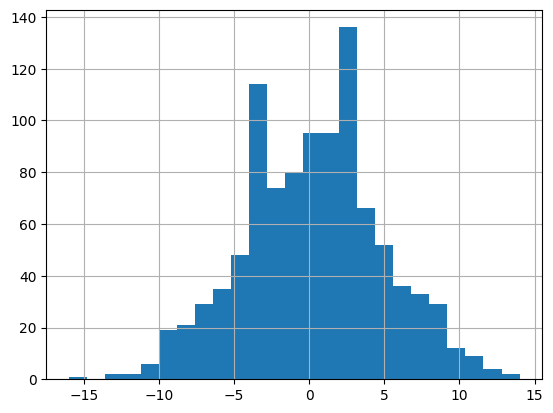

In [14]:
# view max score differential on chart
# distribution should be approx normal 
df_games['score_difference'].hist(bins=25)

In [15]:
# team 1 should win less than 50% of the time, 
# as teams are random and ties are not a victory
df_games['team1_victory'].value_counts(dropna=False)

0    526
1    474
Name: team1_victory, dtype: int64

In [16]:
for x in config['scoring_ranges_extended'].keys():
    print('team 1 win percentage with '+ x + ' on the team')
    print(str(round(100 * df_games[(df_games[f'{x}_team1']==1) & (df_games['team1_victory']==1)].shape[0] / df_games[(df_games[f'{x}_team1']==1)].shape[0], 2))+ '%')

team 1 win percentage with s1 on the team
58.12%
team 1 win percentage with s2 on the team
61.89%
team 1 win percentage with a1 on the team
57.23%
team 1 win percentage with a2 on the team
60.06%
team 1 win percentage with a3 on the team
58.79%
team 1 win percentage with a4 on the team
57.1%
team 1 win percentage with b1 on the team
50.0%
team 1 win percentage with b2 on the team
45.48%
team 1 win percentage with b3 on the team
49.7%
team 1 win percentage with b4 on the team
49.52%
team 1 win percentage with b5 on the team
46.45%
team 1 win percentage with b6 on the team
48.7%
team 1 win percentage with b7 on the team
48.65%
team 1 win percentage with b8 on the team
52.55%
team 1 win percentage with b9 on the team
49.09%
team 1 win percentage with c1 on the team
44.78%
team 1 win percentage with c2 on the team
40.95%
team 1 win percentage with c3 on the team
45.35%
team 1 win percentage with c4 on the team
44.34%
team 1 win percentage with c5 on the team
46.51%
team 1 win percentage wi